In [1]:
import tensorflow.compat.v2 as tf
import PIL
import numpy as np
from matplotlib import pyplot as plt

In [2]:
single_image = tf.keras.preprocessing.image.load_img('J000047.88+141639.1.jpg')

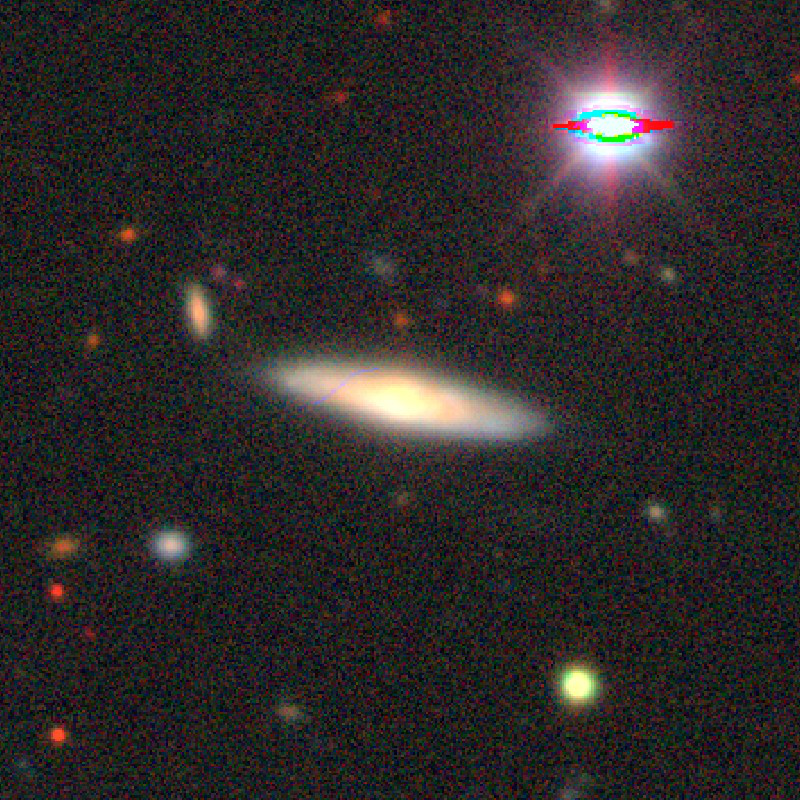

In [3]:
single_image

In [4]:
single_image = tf.keras.preprocessing.image.img_to_array(single_image)
single_image

array([[[56., 45., 62.],
        [24., 23., 31.],
        [10., 25., 28.],
        ...,
        [48., 15., 44.],
        [40., 27., 45.],
        [37., 40., 45.]],

       [[40., 41., 71.],
        [19., 27., 48.],
        [13., 33., 44.],
        ...,
        [51., 18., 37.],
        [42., 25., 35.],
        [42., 36., 36.]],

       [[18., 28., 63.],
        [ 0., 11., 43.],
        [ 0., 11., 37.],
        ...,
        [39., 22., 28.],
        [34., 24., 23.],
        [38., 34., 23.]],

       ...,

       [[34., 49., 52.],
        [16., 62., 59.],
        [ 4., 72., 61.],
        ...,
        [23., 45., 43.],
        [21., 42., 33.],
        [18., 32., 19.]],

       [[ 7., 18., 22.],
        [20., 40., 49.],
        [21., 38., 54.],
        ...,
        [18., 43., 37.],
        [25., 36., 32.],
        [43., 39., 40.]],

       [[11., 11., 19.],
        [43., 34., 55.],
        [53., 18., 58.],
        ...,
        [27., 48., 39.],
        [39., 39., 41.],
        [48., 30., 42.]]

In [5]:
single_image = tf.convert_to_tensor(single_image)
single_image

<tf.Tensor: shape=(800, 800, 3), dtype=float32, numpy=
array([[[56., 45., 62.],
        [24., 23., 31.],
        [10., 25., 28.],
        ...,
        [48., 15., 44.],
        [40., 27., 45.],
        [37., 40., 45.]],

       [[40., 41., 71.],
        [19., 27., 48.],
        [13., 33., 44.],
        ...,
        [51., 18., 37.],
        [42., 25., 35.],
        [42., 36., 36.]],

       [[18., 28., 63.],
        [ 0., 11., 43.],
        [ 0., 11., 37.],
        ...,
        [39., 22., 28.],
        [34., 24., 23.],
        [38., 34., 23.]],

       ...,

       [[34., 49., 52.],
        [16., 62., 59.],
        [ 4., 72., 61.],
        ...,
        [23., 45., 43.],
        [21., 42., 33.],
        [18., 32., 19.]],

       [[ 7., 18., 22.],
        [20., 40., 49.],
        [21., 38., 54.],
        ...,
        [18., 43., 37.],
        [25., 36., 32.],
        [43., 39., 40.]],

       [[11., 11., 19.],
        [43., 34., 55.],
        [53., 18., 58.],
        ...,
        [27., 48., 

In [6]:
croped = tf.image.central_crop(single_image, 0.55)
croped

<tf.Tensor: shape=(442, 442, 3), dtype=float32, numpy=
array([[[ 64.,  36.,  50.],
        [ 82.,  36.,  46.],
        [ 80.,  38.,  40.],
        ...,
        [160.,  96., 123.],
        [145., 108., 126.],
        [118., 106., 120.]],

       [[ 41.,  16.,  37.],
        [ 55.,  12.,  39.],
        [ 43.,  10.,  27.],
        ...,
        [159.,  85., 112.],
        [147., 100., 118.],
        [123., 101., 114.]],

       [[ 20.,  15.,  35.],
        [ 32.,  16.,  52.],
        [ 18.,  15.,  42.],
        ...,
        [161.,  85., 111.],
        [154., 100., 116.],
        [132.,  98., 114.]],

       ...,

       [[ 10.,  19.,  34.],
        [ 18.,  36.,  48.],
        [ 41.,  33.,  46.],
        ...,
        [ 48.,   4.,  21.],
        [ 54.,   2.,  38.],
        [ 41.,   1.,  25.]],

       [[  0.,  32.,  53.],
        [ 17.,  55.,  68.],
        [ 33.,  43.,  55.],
        ...,
        [ 69.,  32.,  49.],
        [ 72.,  28.,  61.],
        [ 58.,  38.,  50.]],

       [[  0.,  3

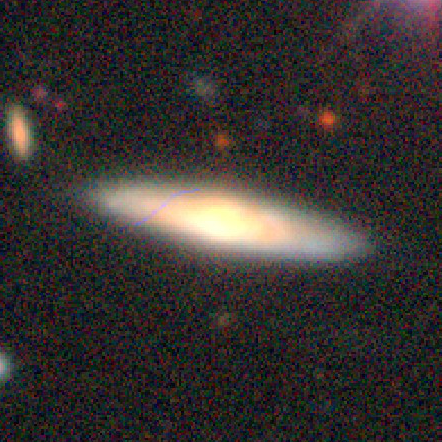

In [7]:
croped = croped.numpy()
croped = tf.keras.preprocessing.image.array_to_img(croped)
croped

In [8]:
# it works

In [9]:
#from the original script
def _compute_crop_shape(
    image_height, image_width, aspect_ratio, crop_proportion):
  """Compute aspect ratio-preserving shape for central crop.

  The resulting shape retains `crop_proportion` along one side and a proportion
  less than or equal to `crop_proportion` along the other side.

  Args:
    image_height: Height of image to be cropped.
    image_width: Width of image to be cropped.
    aspect_ratio: Desired aspect ratio (width / height) of output.
    crop_proportion: Proportion of image to retain along the less-cropped side.

  Returns:
    crop_height: Height of image after cropping.
    crop_width: Width of image after cropping.
  """
  image_width_float = tf.cast(image_width, tf.float32)
  image_height_float = tf.cast(image_height, tf.float32)

  def _requested_aspect_ratio_wider_than_image():
    crop_height = tf.cast(
        tf.math.rint(crop_proportion / aspect_ratio * image_width_float),
        tf.int32)
    crop_width = tf.cast(
        tf.math.rint(crop_proportion * image_width_float), tf.int32)
    return crop_height, crop_width

  def _image_wider_than_requested_aspect_ratio():
    crop_height = tf.cast(
        tf.math.rint(crop_proportion * image_height_float), tf.int32)
    crop_width = tf.cast(
        tf.math.rint(crop_proportion * aspect_ratio * image_height_float),
        tf.int32)
    return crop_height, crop_width

  return tf.cond(
      aspect_ratio > image_width_float / image_height_float,
      _requested_aspect_ratio_wider_than_image,
      _image_wider_than_requested_aspect_ratio)

In [10]:
#from the original script
image = tf.keras.preprocessing.image.load_img('J000047.88+141639.1.jpg')
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.convert_to_tensor(image)
shape = tf.shape(image)
image_height = shape[0]
image_width = shape[1]
crop_height, crop_width = _compute_crop_shape(image_height, image_width, 330 / 330, 0.5)
offset_height = ((image_height - crop_height) + 1) // 2
offset_width = ((image_width - crop_width) + 1) // 2
image = tf.image.crop_to_bounding_box(
      image, offset_height, offset_width, crop_height, crop_width)

image

<tf.Tensor: shape=(400, 400, 3), dtype=float32, numpy=
array([[[ 45.,  46.,  28.],
        [ 51.,  41.,  29.],
        [ 29.,   8.,  15.],
        ...,
        [100.,  59., 101.],
        [ 95.,  57.,  96.],
        [ 88.,  58.,  82.]],

       [[ 40.,  33.,  23.],
        [ 39.,  33.,  37.],
        [  9.,   4.,  27.],
        ...,
        [ 93.,  66., 107.],
        [ 86.,  58.,  96.],
        [ 83.,  57.,  86.]],

       [[ 51.,  36.,  33.],
        [ 37.,  35.,  46.],
        [  0.,  11.,  36.],
        ...,
        [ 95.,  64., 105.],
        [ 89.,  57.,  96.],
        [ 94.,  60.,  97.]],

       ...,

       [[ 17.,  32.,  13.],
        [ 13.,  38.,  16.],
        [  2.,  29.,  14.],
        ...,
        [ 20.,  50.,  52.],
        [ 27.,  57.,  49.],
        [ 25.,  60.,  40.]],

       [[ 22.,  28.,  14.],
        [ 20.,  37.,  18.],
        [  0.,  24.,  15.],
        ...,
        [ 22.,  41.,  56.],
        [ 38.,  50.,  50.],
        [ 36.,  53.,  37.]],

       [[ 30.,  3

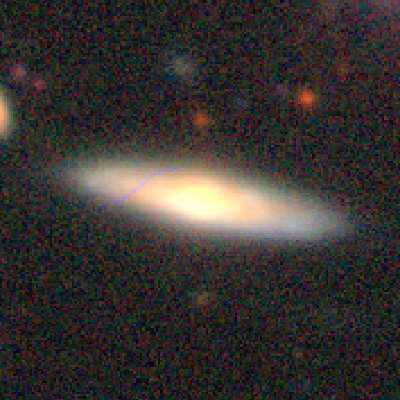

In [11]:
image = image.numpy()
image = tf.keras.preprocessing.image.array_to_img(image)
image

In [12]:
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.convert_to_tensor(image)
image = tf.image.random_crop(image, size=[400, 400, 3])

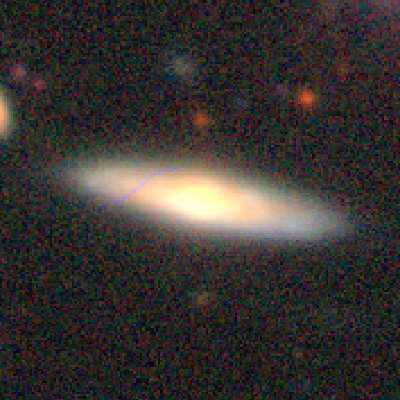

In [13]:
image = image.numpy()
image = tf.keras.preprocessing.image.array_to_img(image)
image

In [14]:
image = tf.keras.preprocessing.image.load_img('J000047.88+141639.1.jpg')
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.convert_to_tensor(image)
image = tf.image.central_crop(image, 0.5)
image =tf.expand_dims(image, axis=0)

In [15]:
ksize = tf.convert_to_tensor(33)
ksize

<tf.Tensor: shape=(), dtype=int32, numpy=33>

In [16]:
ksize = tf.broadcast_to(ksize, [2])
print(ksize)
total = ksize[0] * ksize[1]
total

tf.Tensor([33 33], shape=(2,), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=1089>

In [17]:
index = tf.reshape(tf.range(total), ksize)
index

<tf.Tensor: shape=(33, 33), dtype=int32, numpy=
array([[   0,    1,    2, ...,   30,   31,   32],
       [  33,   34,   35, ...,   63,   64,   65],
       [  66,   67,   68, ...,   96,   97,   98],
       ...,
       [ 990,  991,  992, ..., 1020, 1021, 1022],
       [1023, 1024, 1025, ..., 1053, 1054, 1055],
       [1056, 1057, 1058, ..., 1086, 1087, 1088]], dtype=int32)>

In [18]:
g = tf.where(
        tf.math.equal(index, tf.math.floordiv(total - 1, 2)),
        tf.cast(1 - total, image.dtype),
        tf.cast(1, image.dtype),
    )
g

<tf.Tensor: shape=(33, 33), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [19]:
def pad(input, ksize, mode, constant_values):
    input = tf.convert_to_tensor(input)
    ksize = tf.convert_to_tensor(ksize)
    mode = "CONSTANT" if mode is None else upper(mode)
    constant_values = (
        tf.zeros([], dtype=input.dtype)
        if constant_values is None
        else tf.convert_to_tensor(constant_values, dtype=input.dtype)
    )

    assert mode in ("CONSTANT", "REFLECT", "SYMMETRIC")

    height, width = ksize[0], ksize[1]
    top = (height - 1) // 2
    bottom = height - 1 - top
    left = (width - 1) // 2
    right = width - 1 - left
    paddings = [[0, 0], [top, bottom], [left, right], [0, 0]]
    return tf.pad(input, paddings, mode=mode, constant_values=constant_values)

In [20]:
inpute = pad(image, ksize, None, None)

In [21]:
channel = tf.shape(image)[-1]
shape = tf.concat([ksize, tf.constant([1, 1], ksize.dtype)], axis=0)
g = tf.reshape(g, shape)
shape = tf.concat([ksize, [channel], tf.constant([1], ksize.dtype)], axis=0)
g = tf.broadcast_to(g, shape)

In [22]:
laplace = tf.nn.depthwise_conv2d(image, g, [1, 1, 1, 1], padding="VALID")
laplace

<tf.Tensor: shape=(1, 368, 368, 3), dtype=float32, numpy=
array([[[[-16769.,    565., -13351.],
         [ -7672.,   2771.,  -9271.],
         [  6792.,   3777.,   1578.],
         ...,
         [ 39897., -12183.,  -4571.],
         [ 26559., -11880., -11689.],
         [ 20969.,  -6087., -23233.]],

        [[  1943.,  -2781.,  -4494.],
         [  4486.,  -2760.,  -5899.],
         [ -7167.,  13491.,  -1608.],
         ...,
         [ 29046., -10625., -12038.],
         [  4808.,  -4851., -20245.],
         [  2458.,   2043., -35051.]],

        [[  4689.,  -9412.,  -9589.],
         [   677.,  -8290., -17539.],
         [ -6620.,  14513.,  -8882.],
         ...,
         [ 13808.,  -2537.,  -7638.],
         [-14772.,   3197., -18052.],
         [-14950.,   7873., -35043.]],

        ...,

        [[-21483.,  -9496., -15116.],
         [ -4961., -16195.,  -4955.],
         [ 27557.,  -4558.,  21678.],
         ...,
         [ 36833.,  20008.,   2098.],
         [ 11598.,  12516.,  -

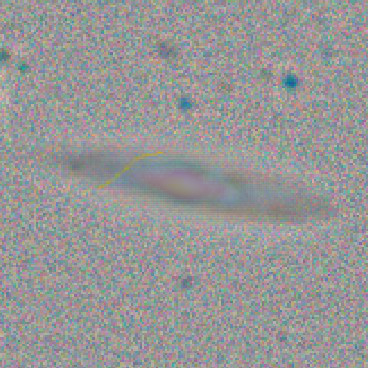

In [23]:
laplace = tf.squeeze(laplace)
laplace = laplace.numpy()
laplace = tf.keras.preprocessing.image.array_to_img(laplace)
laplace

In [24]:
def gabor(
    input,
    freq,
    sigma=None,
    theta=0,
    nstds=3,
    offset=0,
    mode=None,
    constant_values=None,
    name=None,
):

    input = tf.convert_to_tensor(input)

    dtype = tf.complex128

    freq = tf.cast(freq, dtype.real_dtype)
    if sigma is None:
        # See http://www.cs.rug.nl/~imaging/simplecell.html
        b = 1  # bandwidth
        sigma = (
            tf.cast(
                1.0
                / np.pi
                * np.sqrt(np.log(2) / 2.0)
                * (2.0 ** b + 1)
                / (2.0 ** b - 1),
                dtype.real_dtype,
            )
            / freq
        )
    sigma = tf.broadcast_to(sigma, [2])
    sigma_x, sigma_y = sigma[0], sigma[1]
    theta = tf.cast(theta, dtype.real_dtype)
    nstds = tf.cast(nstds, dtype.real_dtype)
    offset = tf.cast(offset, dtype.real_dtype)

    x0 = tf.math.ceil(
        tf.math.maximum(
            tf.math.abs(nstds * sigma_x * tf.math.cos(theta)),
            tf.math.abs(nstds * sigma_y * tf.math.sin(theta)),
            tf.cast(1, dtype.real_dtype),
        )
    )
    y0 = tf.math.ceil(
        tf.math.maximum(
            tf.math.abs(nstds * sigma_y * tf.math.cos(theta)),
            tf.math.abs(nstds * sigma_x * tf.math.sin(theta)),
            tf.cast(1, dtype.real_dtype),
        )
    )
    y, x = tf.meshgrid(tf.range(-y0, y0 + 1), tf.range(-x0, x0 + 1))
    y, x = tf.transpose(y), tf.transpose(x)

    rotx = y * tf.math.sin(theta) + x * tf.math.cos(theta)
    roty = y * tf.math.cos(theta) - x * tf.math.sin(theta)

    g = tf.math.exp(-0.5 * (rotx ** 2 / sigma_x ** 2 + roty ** 2 / sigma_y ** 2))
    g = g / (2 * np.pi * sigma_x * sigma_y)
    g = tf.cast(g, dtype) * tf.exp(
        tf.cast(1j, dtype) * tf.cast(2 * np.pi * freq * rotx + offset, dtype)
    )

    ksize = tf.shape(g)

    input = pad(input, ksize, mode, constant_values)

    channel = tf.shape(input)[-1]
    shape = tf.concat([ksize, tf.constant([1, 1], ksize.dtype)], axis=0)
    g = tf.reshape(g, shape)
    shape = tf.concat([ksize, [channel], tf.constant([1], ksize.dtype)], axis=0)
    g = tf.broadcast_to(g, shape)

    real = tf.nn.depthwise_conv2d(
        input, tf.cast(tf.math.real(g), input.dtype), [1, 1, 1, 1], padding="VALID"
    )
    imag = tf.nn.depthwise_conv2d(
        input, tf.cast(tf.math.imag(g), input.dtype), [1, 1, 1, 1], padding="VALID"
    )
    return tf.complex(real, imag)

In [25]:
gab = gabor(image,12)

In [26]:
gab

<tf.Tensor: shape=(1, 400, 400, 3), dtype=complex64, numpy=
array([[[[3263.2993 +0.j, 3335.817  +0.j, 2030.4973 +0.j],
         [3698.4058 +0.j, 2973.2283 +0.j, 2103.0151 +0.j],
         [2103.0151 +0.j,  580.1421 +0.j, 1087.7664 +0.j],
         ...,
         [7251.7764 +0.j, 4278.548  +0.j, 7324.294  +0.j],
         [6889.1875 +0.j, 4133.512  +0.j, 6961.705  +0.j],
         [6381.563  +0.j, 4206.0303 +0.j, 5946.4565 +0.j]],

        [[2900.7104 +0.j, 2393.0862 +0.j, 1667.9084 +0.j],
         [2828.1926 +0.j, 2393.0862 +0.j, 2683.1572 +0.j],
         [ 652.65985+0.j,  290.07104+0.j, 1957.9795 +0.j],
         ...,
         [6744.152  +0.j, 4786.1724 +0.j, 7759.4004 +0.j],
         [6236.5273 +0.j, 4206.0303 +0.j, 6961.705  +0.j],
         [6018.974  +0.j, 4133.512  +0.j, 6236.5273 +0.j]],

        [[3698.4058 +0.j, 2610.6394 +0.j, 2393.0862 +0.j],
         [2683.1572 +0.j, 2538.1216 +0.j, 3335.817  +0.j],
         [   0.     +0.j,  797.6954 +0.j, 2610.6394 +0.j],
         ...,
         

In [27]:
def prewitt(input, mode=None, constant_values=None, name=None):

    input = tf.convert_to_tensor(input)

    gx = tf.cast([[1, 0, -1], [1, 0, -1], [1, 0, -1]], input.dtype)
    gy = tf.cast([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], input.dtype)

    ksize = tf.constant([3, 3])

    input = pad(input, ksize, mode, constant_values)

    channel = tf.shape(input)[-1]
    shape = tf.concat([ksize, tf.constant([1, 1], ksize.dtype)], axis=0)
    gx, gy = tf.reshape(gx, shape), tf.reshape(gy, shape)
    shape = tf.concat([ksize, [channel], tf.constant([1], ksize.dtype)], axis=0)
    gx, gy = tf.broadcast_to(gx, shape), tf.broadcast_to(gy, shape)

    x = tf.nn.depthwise_conv2d(
        input, tf.cast(gx, input.dtype), [1, 1, 1, 1], padding="VALID"
    )
    y = tf.nn.depthwise_conv2d(
        input, tf.cast(gy, input.dtype), [1, 1, 1, 1], padding="VALID"
    )
    return tf.math.sqrt(x * x + y * y)

In [28]:
prewit = prewitt(image)

In [29]:
prewit

<tf.Tensor: shape=(1, 400, 400, 3), dtype=float32, numpy=
array([[[[119.753914 ,  99.15644  ,  89.19641  ],
         [ 99.764725 ,  96.89685  ,  87.46428  ],
         [ 81.055534 ,  76.02631  , 100.12492  ],
         ...,
         [278.79202  , 192.58505  , 302.00165  ],
         [262.92203  , 181.27603  , 291.75504  ],
         [247.6328   , 162.63457  , 264.55246  ]],

        [[127.25172  , 110.16805  , 114.14027  ],
         [104.75209  ,  92.91394  ,  43.416588 ],
         [120.37026  ,  78.77182  ,  56.568542 ],
         ...,
         [ 32.526913 ,  19.416489 ,   8.062258 ],
         [ 23.537205 ,  15.652476 ,  51.62364  ],
         [270.       , 172.01163  , 288.39035  ]],

        [[118.08895  , 109.041275 , 124.40257  ],
         [128.0039   ,  57.384666 ,  43.27817  ],
         [109.07337  ,  89.       ,  51.92302  ],
         ...,
         [ 37.64306  ,  33.526108 ,  18.027756 ],
         [ 37.01351  ,  37.215588 ,  41.4367   ],
         [266.48077  , 165.09694  , 281.0071  

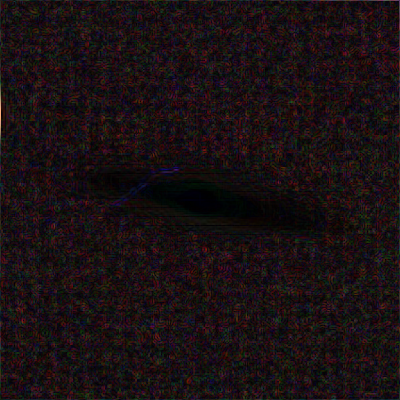

In [30]:
prewit = tf.squeeze(prewit)
prewit = prewit.numpy()
prewit = tf.keras.preprocessing.image.array_to_img(prewit)
prewit

In [31]:
def sobel(input, mode=None, constant_values=None, name=None):
    input = tf.convert_to_tensor(input)

    gx = tf.cast([[1, 0, -1], [2, 0, -2], [1, 0, -1]], input.dtype)
    gy = tf.cast([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], input.dtype)

    ksize = tf.constant([3, 3])

    input = pad(input, ksize, mode, constant_values)

    channel = tf.shape(input)[-1]
    shape = tf.concat([ksize, tf.constant([1, 1], ksize.dtype)], axis=0)
    gx, gy = tf.reshape(gx, shape), tf.reshape(gy, shape)
    shape = tf.concat([ksize, [channel], tf.constant([1], ksize.dtype)], axis=0)
    gx, gy = tf.broadcast_to(gx, shape), tf.broadcast_to(gy, shape)

    x = tf.nn.depthwise_conv2d(
        input, tf.cast(gx, input.dtype), [1, 1, 1, 1], padding="VALID"
    )
    y = tf.nn.depthwise_conv2d(
        input, tf.cast(gy, input.dtype), [1, 1, 1, 1], padding="VALID"
    )
    return tf.math.sqrt(x * x + y * y)

In [32]:
sob = sobel(image)
sob

<tf.Tensor: shape=(1, 400, 400, 3), dtype=float32, numpy=
array([[[[184.50475 , 151.74321 , 126.1507  ],
         [141.76741 , 147.085   , 125.93649 ],
         [108.16654 , 109.12378 , 127.3185  ],
         ...,
         [372.13168 , 258.77405 , 409.03055 ],
         [349.65698 , 239.253   , 389.49454 ],
         [373.73788 , 243.24474 , 393.40564 ]],

        [[166.01205 , 144.36066 , 151.42654 ],
         [138.71553 , 122.48265 ,  60.033325],
         [166.46922 , 104.93808 ,  77.52419 ],
         ...,
         [ 45.607018,  30.364452,   7.071068],
         [ 34.785053,  24.04163 ,  71.568146],
         [356.05057 , 230.03477 , 385.1701  ]],

        [[156.89487 , 144.01389 , 170.75128 ],
         [178.90779 ,  82.0975  ,  48.270073],
         [146.05478 , 127.47549 ,  73.82411 ],
         ...,
         [ 48.270073,  37.363083,  23.409399],
         [ 41.617306,  45.607018,  50.695168],
         [356.02527 , 222.89459 , 377.01193 ]],

        ...,

        [[ 60.876926, 146.0137  , 

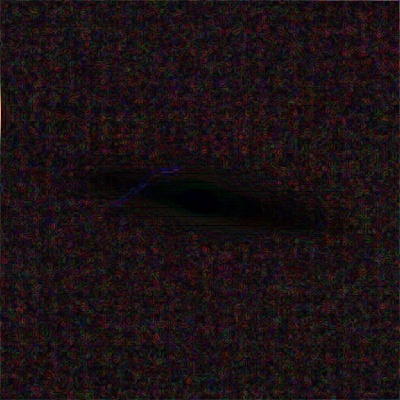

In [33]:
sob = tf.squeeze(sob)
sob = sob.numpy()
sob = tf.keras.preprocessing.image.array_to_img(sob)
sob

In [34]:
def gaussian(input, ksize, sigma, mode=None, constant_values=None, name=None):
    """
    Apply Gaussian filter to image.
    Args:
      input: A 4-D (`[N, H, W, C]`) Tensor.
      ksize: A scalar or 1-D `[kx, ky]` Tensor.
        Size of the Gaussian kernel.
        If scalar, then `ksize` will be broadcasted to 1-D `[kx, ky]`.
      sigma: A scalar or 1-D `[sx, sy]` Tensor.
        Standard deviation for Gaussian kernel.
        If scalar, then `sigma` will be broadcasted to 1-D `[sx, sy]`.
      mode: A `string`. One of "CONSTANT", "REFLECT", or "SYMMETRIC"
        (case-insensitive). Default "CONSTANT".
      constant_values: A `scalar`, the pad value to use in "CONSTANT"
        padding mode. Must be same type as input. Default 0.
      name: A name for the operation (optional).
    Returns:
      A 4-D (`[N, H, W, C]`) Tensor.
    """

    input = tf.convert_to_tensor(input)
    ksize = tf.convert_to_tensor(ksize)
    sigma = tf.cast(sigma, input.dtype)

    def kernel1d(ksize, sigma, dtype):
        x = tf.range(ksize, dtype=dtype)
        x = x - tf.cast(tf.math.floordiv(ksize, 2), dtype=dtype)
        x = x + tf.where(
            tf.math.equal(tf.math.mod(ksize, 2), 0), tf.cast(0.5, dtype), 0
        )
        g = tf.math.exp(-(tf.math.pow(x, 2) / (2 * tf.math.pow(sigma, 2))))
        g = g / tf.reduce_sum(g)
        return g

    def kernel2d(ksize, sigma, dtype):
        kernel_x = kernel1d(ksize[0], sigma[0], dtype)
        kernel_y = kernel1d(ksize[1], sigma[1], dtype)
        return tf.matmul(
            tf.expand_dims(kernel_x, axis=-1),
            tf.transpose(tf.expand_dims(kernel_y, axis=-1)),
        )

    ksize = tf.broadcast_to(ksize, [2])
    sigma = tf.broadcast_to(sigma, [2])
    g = kernel2d(ksize, sigma, input.dtype)

    input = pad(input, ksize, mode, constant_values)

    channel = tf.shape(input)[-1]
    shape = tf.concat([ksize, tf.constant([1, 1], ksize.dtype)], axis=0)
    g = tf.reshape(g, shape)
    shape = tf.concat([ksize, [channel], tf.constant([1], ksize.dtype)], axis=0)
    g = tf.broadcast_to(g, shape)
    return tf.nn.depthwise_conv2d(input, g, [1, 1, 1, 1], padding="VALID")

In [35]:
gau = gaussian(image, 400//10, 5)
gau1 = tf.squeeze(gau)
gau1 = gau1.numpy()
gau1 = tf.keras.preprocessing.image.array_to_img(gau1)
gau1

InternalError: Blas xGEMM launch failed : a.shape=[1,40,1], b.shape=[1,1,40], m=40, n=40, k=1 [Op:MatMul]

In [ ]:
gau = sobel(gau)
gau2 = tf.squeeze(gau)
gau2 = gau2.numpy()
gau2 = tf.keras.preprocessing.image.array_to_img(gau2)
gau2

In [ ]:
image = tf.keras.preprocessing.image.load_img('J000605.72+135843.8.jpg')
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.convert_to_tensor(image)
image = tf.image.central_crop(image, 0.5)
image =tf.expand_dims(image, axis=0)
gaus = gaussian(image, 400//10, 5)
gaus1 = tf.squeeze(gaus)
gaus1 = gaus1.numpy()
gaus1 = tf.keras.preprocessing.image.array_to_img(gaus1)
gaus1

In [ ]:
gau = sobel(gaus)
gauss1 = tf.squeeze(gau)
gauss1 = gauss1.numpy()
gauss1 = tf.keras.preprocessing.image.array_to_img(gauss1)
gauss1

In [ ]:
gaus1

In [ ]:
lista = []
lista.append(gau1)
lista.append(gaus1)
lista.append(gau2)
lista.append(gauss1)
lista2 = ['Filtro Gaussiano im 1', 'Filtro Gaussiano im 2', 'Sobel Mag im 1', 'Sobel Mag im 2']

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(lista[i])
  #label = label_batch[i]
  plt.title(lista2[i])
  plt.axis("off")
plt.savefig('sobel.png')